In [ ]:
import folium as fl
import pandas as pd

In [ ]:
s = fl.Map(location=[41.390205, 2.154007],
           zoom_start=13)

In [ ]:
data = pd.read_csv('/content/2021_qualitat_aire_estacions (1).csv')

In [ ]:
uno = data.loc[0]
uno

Estacio                                                50
nom_cabina                         Barcelona - Ciutadella
codi_dtes                                              IL
zqa                                                     1
codi_eoi                                          8019050
Longitud                                           2.1874
Latitud                                           41.3864
ubicacio                            Parc de la Ciutadella
Codi_districte                                          1
Nom_districte                                Ciutat Vella
Codi_barri                                              4
Nom_barri           Sant Pere, Santa Caterina i la Ribera
Clas_1                                             Urbana
Clas_2                                               Fons
Codi_Contaminant                                        8
Name: 0, dtype: object

In [ ]:
data.iloc[9]

Estacio                                         43
nom_cabina                    Barcelona - Eixample
codi_dtes                                       IH
zqa                                              1
codi_eoi                                   8019043
Longitud                                    2.1538
Latitud                                    41.3853
ubicacio                Av. Roma - c/ Comte Urgell
Codi_districte                                   5
Nom_districte                             Eixample
Codi_barri                                       9
Nom_barri           la Nova Esquerra de l'Eixample
Clas_1                                      Urbana
Clas_2                                     Trànsit
Codi_Contaminant                                 7
Name: 9, dtype: object

In [ ]:
data.Estacio.value_counts()

43    12
54    12
57     8
44     7
50     4
4      4
42     3
Name: Estacio, dtype: int64

In [ ]:
for i in range(50):
  # Guardamos el nombre de la estación
  num = data.Estacio[i]
  tooltip = 'Número de estación: '+ str(num)
  popup = 'Estación: '+ str(num)
  # Asignamos al mapa los atributos de la estación y su ubicación
  fl.Marker([data.Latitud[i], data.Longitud[i]], popup = popup, tooltip = tooltip).add_to(s)

# Visualización del mapa con las estaciones
s

- Bibliografía:

https://python-visualization.github.io/folium/quickstart.html#Getting-Started

https://e-archivo.uc3m.es/bitstream/handle/10016/31974/TFG_Isabel-Maria_San-Jose_Garcia.pdf?sequence=1

https://python-visualization.github.io/folium/modules.html

https://www.kaggle.com/code/cheyenneamoroso/drawing-geojson-barcelona/notebook



## Segunda parte. Añadimos los contaminantes que mide cada estación.

In [ ]:
# Función que transforma los datasets y les añade una columna con el nombre
import pandas as pd
import numpy as np

def integratemetadata():
	"""
	integratemetadata() arregla el problema de que en las medidas de 2020-21 los contaminantes salen por código en vez de por nombre propio.
	devuelve una copia de las medidas de 2020-2021 con una columna nueva (CONTAMINANTE) con el nombre del contaminante
	"""
	medidas_str = "2020-21.csv"
	medidas = pd.read_csv(medidas_str)
	
	meta = "qualitat_aire_contaminants.csv"
	meta = pd.read_csv(meta)

	# crea diccionario con código de contaminante y nombres, reemplaza la columna
	dic = dict(meta[["Codi_Contaminant","Desc_Contaminant"]].values)
	print(dic)
	#medidas["CODI_CONTAMINANT"] = medidas["CODI_CONTAMINANT"].replace('nan', np.nan).fillna(0)
	test = medidas["CODI_CONTAMINANT"]
	print(set(test))
	print(medidas["CODI_CONTAMINANT"])
	medidas["CONTAMINANTE"] = medidas["CODI_CONTAMINANT"].replace(dic)
	return medidas

In [ ]:
test = integratemetadata()

In [ ]:
test

In [ ]:
test.drop(['CODI_PROVINCIA','PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI'], axis='columns', inplace=True)

In [ ]:
test.columns

In [ ]:
test_clean = test[['ESTACIO','CODI_CONTAMINANT','CONTAMINANTE']]

In [ ]:
(test_clean['CODI_CONTAMINANT'] == test_clean['CONTAMINANTE']).value_counts()

In [ ]:
test_clean['CODI_CONTAMINANT'].isnull().value_counts()

In [ ]:
test_clean['CONTAMINANTE'].isnull().value_counts()

In [ ]:
test_wo_null = test_clean.dropna()

In [ ]:
test_wo_null['CODI_CONTAMINANT'].isnull().value_counts()

In [ ]:
test_wo_null

In [ ]:
test_bef_join = test_wo_null[['ESTACIO','CONTAMINANTE']]

In [ ]:
(test_wo_null['CODI_CONTAMINANT'] == test_wo_null['CONTAMINANTE']).value_counts()

In [ ]:
dat = pd.read_csv('qualitat_aire_contaminants.csv')

In [ ]:
dat

In [ ]:
test_filter = test_bef_join.drop_duplicates()

In [ ]:
test_fil_re = test_filter.rename(columns={'CONTAMINANTE':'Codi_Contaminant'})

In [ ]:
res = dat.to_dict()

In [ ]:
dat

In [ ]:
type(test_filter['CONTAMINANTE'][0])

In [ ]:
dat = dat[0:9]
dat

In [ ]:
test_filter

In [ ]:
test_filter = test_filter.drop(index=2583)

In [ ]:
test_filter = test_filter.rename(columns={'CONTAMINANTE':'Codi_Contaminant'})
test_filter['ESTACIO'] = test_filter['ESTACIO'].astype(int)
test_filter['Codi_Contaminant'] = test_filter['Codi_Contaminant'].astype(int)
type(test_filter['Codi_Contaminant'][0])


numpy.int64

In [ ]:
# Realizamos la unión de los datos
res = test_filter.merge(dat, how='right')
res_final = res.sort_values('ESTACIO')

In [ ]:
# Representación del DataFrame final
res_final.head()

-------------------------------- Siguiente Mapa-----------------------------

In [ ]:
map2 = fl.Map(location=[41.390205, 2.154007],
           zoom_start=13)

In [ ]:
edef listado_compo(num):
  '''
  Devuelve una lista con los nombres de los contaminantes y sus unidades en función de la estación de medición.
  '''
  data_una_Estacion = res_final[res_final['ESTACIO'] == num]
  listado = list(data_una_Estacion.iloc[:,[2,3]].values)
  componente = ''
  longitud = len(listado)
  for i in range(0,longitud):
    componente += listado[i][0] +'['+ listado[i][1] + '] '
 
  return componente

data_una_Estacion = res_final[res_final['ESTACIO'] == 42]
listado = list(data_una_Estacion.iloc[:,[2,3]].values)
for i in range(0,len(listado)):
  print(listado[i][0] +' ['+ listado[i][1]+']\n')

NO [µg/m³]

NOx [µg/m³]

NO2 [µg/m³]



In [ ]:
listado_compo(43)

'SO2[µg/m³] PM10[µg/m³] CO[mg/m³] O3[µg/m³] Black Carbon[µg/m³] NO2[µg/m³] NOx[µg/m³] NO[µg/m³] '

In [ ]:
a[1][0]

'NO'

In [ ]:
for i in range(50):
  # Guardamos el nombre de la estación
  num = data.Estacio[i]
  tooltip = 'Número de estación: '+ str(num)
  popup = 'Contaminantes:  '+listado_compo(num)
  # Asignamos al mapa los atributos de la estación y su ubicación
  fl.Marker([data.Latitud[i], data.Longitud[i]], popup = popup, tooltip = tooltip).add_to(map2)

# Visualización del mapa con las estaciones
map2

## Algoritmo Prophet Facebook.

Enlaces para trabajar con el modelo.
- https://medium.com/analytics-vidhya/forecasting-using-facebooks-prophet-library-ce628e76586b

- https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/



In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 1.2 MB/s 
     |████████████████████████████████| 49 kB 3.9 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640578 sha256=dd48f25bfb514e9cde076edbf72ae7f92fe7157cb6f2fb7b095e3396cebf8e74
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [ ]:
model = Prophet()

Desktop/Proyecto/GreenSaturdaysAI/src/mediciones.csv

In [ ]:
data = pd.read_csv('mediciones.csv')

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data

,ESTACIO,CONTAMINANTE,variable,value
0,4,NO,H01,3.0
1,4,NO,H01,1.0
2,4,NO,H01,35.0
3,4,NO,H01,18.0
4,4,NO,H01,11.0
...,...,...,...,...
390667,58,O3,H24,4.0
390668,58,O3,H24,4.0
390669,58,O3,H24,4.0
390670,58,O3,H24,53.0


In [ ]:
data.CONTAMINANTE.value_counts()

NO                                61896
NOx                               61896
NO2                               61824
O3                                45960
PM10                              45024
SO2                               31008
CO                                28896
Flow 2 (Mesura interna equip)     10560
Flow 1 (Mesura interna equip)     10560
Flow C (Mesura interna equip)     10560
Biomassa Black Carbon             10560
Black Carbon                      10080
PM2.5                              1032
2                                   816
Name: CONTAMINANTE, dtype: int64

In [ ]:
dat = pd.read_csv('2020-21.csv')
dat

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2020,1,1,3.0,...,18.0,V,40.0,V,44.0,V,31.0,V,33.0,V
1,8,Barcelona,19,Barcelona,4,7,2020,1,2,13.0,...,18.0,V,10.0,V,3.0,V,57.0,V,NaN,N
2,8,Barcelona,19,Barcelona,4,7,2020,1,3,33.0,...,56.0,V,46.0,V,40.0,V,32.0,V,NaN,N
3,8,Barcelona,19,Barcelona,4,7,2020,1,4,12.0,...,5.0,V,7.0,V,2.0,V,3.0,V,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2020,1,5,1.0,...,73.0,V,53.0,V,33.0,V,29.0,V,25.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,8,Barcelona,19,Barcelona,58,14,2021,12,26,51.0,...,4.0,V,4.0,V,9.0,V,7.0,V,4.0,V
36109,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,4.0,V,12.0,V,4.0,V,4.0,V,4.0,V
36110,8,Barcelona,19,Barcelona,58,14,2021,12,28,4.0,...,56.0,V,58.0,V,57.0,V,57.0,V,57.0,V
36111,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,52.0,V,51.0,V,51.0,V,53.0,V,53.0,V


In [ ]:
def con_fecha(dd, mm , aaaa):
  if dd < 10:
    dd = '0'+str(dd)
  else:
    dd = str(dd)
  
  if mm < 10:
    mm = '0'+str(mm)
  else:
    mm = str(mm)
  return dd + '-' + mm + '-' + str(aaaa)

In [ ]:
len(dat.ESTACIO)

36113

In [ ]:

fecha = []
for i in range(len(dat.ESTACIO)):
  fecha.append( con_fecha(dat.DIA[i], dat.MES[i], dat.ANY[i]) )

In [ ]:
dat['ds'] = fecha

In [ ]:
dat

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,ds
0,8,Barcelona,19,Barcelona,4,7,2020,1,1,3.0,...,V,40.0,V,44.0,V,31.0,V,33.0,V,01-01-2020
1,8,Barcelona,19,Barcelona,4,7,2020,1,2,13.0,...,V,10.0,V,3.0,V,57.0,V,NaN,N,02-01-2020
2,8,Barcelona,19,Barcelona,4,7,2020,1,3,33.0,...,V,46.0,V,40.0,V,32.0,V,NaN,N,03-01-2020
3,8,Barcelona,19,Barcelona,4,7,2020,1,4,12.0,...,V,7.0,V,2.0,V,3.0,V,NaN,N,04-01-2020
4,8,Barcelona,19,Barcelona,4,7,2020,1,5,1.0,...,V,53.0,V,33.0,V,29.0,V,25.0,V,05-01-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,8,Barcelona,19,Barcelona,58,14,2021,12,26,51.0,...,V,4.0,V,9.0,V,7.0,V,4.0,V,26-12-2021
36109,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,V,12.0,V,4.0,V,4.0,V,4.0,V,27-12-2021
36110,8,Barcelona,19,Barcelona,58,14,2021,12,28,4.0,...,V,58.0,V,57.0,V,57.0,V,57.0,V,28-12-2021
36111,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,V,51.0,V,51.0,V,53.0,V,53.0,V,29-12-2021


In [ ]:
print('Training prophet..')

model.fit(dat)
#%% Forecast 1 year
years = 1
future = model.make_future_dataframe(periods=365*years)
future.tail()

Training prophet..


ValueError: ignored

In [ ]:
# Meterse en C:\Users\cesar\Desktop\Proyecto\GreenSaturdaysAI\src/ model o modelo - ahío esta el datafram completo de Alex

## Transformación de los datos de medidas 2020-21

In [ ]:
df = pd.read_csv("/content/2020-21.csv")

In [ ]:
df

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,8,Barcelona,19,Barcelona,4,7,2020,1,1,3.0,...,18.0,V,40.0,V,44.0,V,31.0,V,33.0,V
1,8,Barcelona,19,Barcelona,4,7,2020,1,2,13.0,...,18.0,V,10.0,V,3.0,V,57.0,V,NaN,N
2,8,Barcelona,19,Barcelona,4,7,2020,1,3,33.0,...,56.0,V,46.0,V,40.0,V,32.0,V,NaN,N
3,8,Barcelona,19,Barcelona,4,7,2020,1,4,12.0,...,5.0,V,7.0,V,2.0,V,3.0,V,NaN,N
4,8,Barcelona,19,Barcelona,4,7,2020,1,5,1.0,...,73.0,V,53.0,V,33.0,V,29.0,V,25.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,8,Barcelona,19,Barcelona,58,14,2021,12,26,51.0,...,4.0,V,4.0,V,9.0,V,7.0,V,4.0,V
36109,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,4.0,V,12.0,V,4.0,V,4.0,V,4.0,V
36110,8,Barcelona,19,Barcelona,58,14,2021,12,28,4.0,...,56.0,V,58.0,V,57.0,V,57.0,V,57.0,V
36111,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,52.0,V,51.0,V,51.0,V,53.0,V,53.0,V


In [ ]:
# Creamos una columna que determuine las fecha en las que existia el covid
df["covid"] = 0
# Creamos una columna con las fechas
df["fecha"] = df[["DIA", "MES", "ANY"]].astype(str).agg('/'.join, axis = 1)

In [ ]:
festivos = ["1/1/2018","6/1/2018","30/3/2018","2/4/2018","1/5/2018","21/5/2018","15/8/2018","11/9/2018","24/9/2018","12/10/2018","1/11/2018","6/12/2018","8/12/2018","25/12/2018","26/12/2018","1/1/2019","6/1/2019","19/4/2019","22/4/2019","1/5/2019","10/6/2019","15/8/2019","11/9/2019","24/9/2019","12/10/2019","1/11/2019","6/12/2019","8/12/2019","25/12/2019","26/12/2019","1/1/2020","6/1/2020","10/4/2020","13/4/2020","1/5/2020","1/6/2020","24/6/2020","15/8/2020","11/9/2020","24/9/2020","12/10/2020","8/12/2020","25/12/2020","26/12/2020","1/1/2021","6/1/2021","2/4/2021","5/4/2021","1/5/2021","24/6/2021","11/9/2021","12/10/2021","1/11/2021","6/12/2021","8/12/2021","25/12/2021"]
#[lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, '%d/%m/%Y'),'%d/%m/%Y') for x in festivos]
#[lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, '%d/%m/%Y'),'%d/%m/%Y') for x in fechas]

In [ ]:
df['festivo'] = 100

In [ ]:
df['festivo'] = df['fecha'].apply(lambda x: 1 if x in festivos else 0)

In [ ]:
df

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V21,H22,V22,H23,V23,H24,V24,covid,fecha,festivo
0,8,Barcelona,19,Barcelona,4,7,2020,1,1,3.0,...,V,44.0,V,31.0,V,33.0,V,0,1/1/2020,1
1,8,Barcelona,19,Barcelona,4,7,2020,1,2,13.0,...,V,3.0,V,57.0,V,NaN,N,0,2/1/2020,0
2,8,Barcelona,19,Barcelona,4,7,2020,1,3,33.0,...,V,40.0,V,32.0,V,NaN,N,0,3/1/2020,0
3,8,Barcelona,19,Barcelona,4,7,2020,1,4,12.0,...,V,2.0,V,3.0,V,NaN,N,0,4/1/2020,0
4,8,Barcelona,19,Barcelona,4,7,2020,1,5,1.0,...,V,33.0,V,29.0,V,25.0,V,0,5/1/2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,8,Barcelona,19,Barcelona,58,14,2021,12,26,51.0,...,V,9.0,V,7.0,V,4.0,V,0,26/12/2021,0
36109,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,V,4.0,V,4.0,V,4.0,V,0,27/12/2021,0
36110,8,Barcelona,19,Barcelona,58,14,2021,12,28,4.0,...,V,57.0,V,57.0,V,57.0,V,0,28/12/2021,0
36111,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,V,51.0,V,53.0,V,53.0,V,0,29/12/2021,0


In [ ]:
h = df.fecha.unique()
len(h)

721

In [ ]:
inicio = pd.datetime.strptime('01/01/2020', '%d/%m/%Y')
fin = pd.datetime.strptime('31/12/2021', '%d/%m/%Y')

dates = pd.date_range(start=inicio, end=fin, freq="D")
dates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

In [ ]:
aux_finde = []
aux_fecha = []
for i in range(len(dates)):
  # Extraemos el formato fecha en string de cara al merge con el dataframe
  aux_fecha.append(str(dates[i]).split(' ')[0])
  # Cuantificamos el fia de la semana que es finde 
  if dates[i].day_name() == 'Saturday' or dates[i].day_name() == 'Sunday':
    aux_finde.append(1)
  else:
    aux_finde.append(0)

In [ ]:
# Comprobamos que tienen la misma longitud
print(len(aux_fecha) , len(aux_finde) )

731 731


Diccionario par clave-valor: (fecha : [finde SI/NO])

In [ ]:
dic_findes = dict(zip(aux_fecha , aux_finde))

In [ ]:
def convert_fecha(cadena):
  '''
  Función que rellena los día y meses de un solo carácter para crear un formato de fecha aaaa-mm-dd
  '''
  dd = cadena.split('/')[0]
  mm = cadena.split('/')[1]
  aaaa = cadena.split('/')[2]

  if int(mm) < 10:
    mm = '0' + mm
  if int(dd) < 10:
    dd = '0' + dd

  return aaaa + '-' + mm + '-' + dd 

In [ ]:
convert_fecha('9/1/2021')

'2021-01-09'

In [ ]:
# Reemplazamos las '/' por '-' de cara a la comparación
df['fecha'] = df['fecha'].apply(convert_fecha)

In [ ]:
df

,CODI_PROVINCIA,PROVINCIA,CODI_MUNICIPI,MUNICIPI,ESTACIO,CODI_CONTAMINANT,ANY,MES,DIA,H01,...,V21,H22,V22,H23,V23,H24,V24,covid,fecha,festivo
0,8,Barcelona,19,Barcelona,4,7,2020,1,1,3.0,...,V,44.0,V,31.0,V,33.0,V,0,2020-01-01,1
1,8,Barcelona,19,Barcelona,4,7,2020,1,2,13.0,...,V,3.0,V,57.0,V,NaN,N,0,2020-01-02,0
2,8,Barcelona,19,Barcelona,4,7,2020,1,3,33.0,...,V,40.0,V,32.0,V,NaN,N,0,2020-01-03,0
3,8,Barcelona,19,Barcelona,4,7,2020,1,4,12.0,...,V,2.0,V,3.0,V,NaN,N,0,2020-01-04,0
4,8,Barcelona,19,Barcelona,4,7,2020,1,5,1.0,...,V,33.0,V,29.0,V,25.0,V,0,2020-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,8,Barcelona,19,Barcelona,58,14,2021,12,26,51.0,...,V,9.0,V,7.0,V,4.0,V,0,2021-12-26,0
36109,8,Barcelona,19,Barcelona,58,14,2021,12,27,4.0,...,V,4.0,V,4.0,V,4.0,V,0,2021-12-27,0
36110,8,Barcelona,19,Barcelona,58,14,2021,12,28,4.0,...,V,57.0,V,57.0,V,57.0,V,0,2021-12-28,0
36111,8,Barcelona,19,Barcelona,58,14,2021,12,29,57.0,...,V,51.0,V,53.0,V,53.0,V,0,2021-12-29,0


In [ ]:
findes = []
for i in range(len(df.fecha)):
  # Obtenemos la fecha 
  fecha = df.fecha[i]
  findes.append(dic_findes.get(fecha))

In [ ]:
df['findes'] = findes

In [ ]:
df.columns

Index(['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI', 'ESTACIO',
       'CODI_CONTAMINANT', 'ANY', 'MES', 'DIA', 'H01', 'V01', 'H02', 'V02',
       'H03', 'V03', 'H04', 'V04', 'H05', 'V05', 'H06', 'V06', 'H07', 'V07',
       'H08', 'V08', 'H09', 'V09', 'H10', 'V10', 'H11', 'V11', 'H12', 'V12',
       'H13', 'V13', 'H14', 'V14', 'H15', 'V15', 'H16', 'V16', 'H17', 'V17',
       'H18', 'V18', 'H19', 'V19', 'H20', 'V20', 'H21', 'V21', 'H22', 'V22',
       'H23', 'V23', 'H24', 'V24', 'covid', 'fecha', 'festivo', 'findes'],
      dtype='object')

In [ ]:
df = df.drop(columns= ['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI','ANY', 'MES', 'DIA'])

In [ ]:
df

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,H22,V22,H23,V23,H24,V24,covid,fecha,festivo,findes
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,44.0,V,31.0,V,33.0,V,0,2020-01-01,1,0
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,3.0,V,57.0,V,NaN,N,0,2020-01-02,0,0
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,40.0,V,32.0,V,NaN,N,0,2020-01-03,0,0
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,2.0,V,3.0,V,NaN,N,0,2020-01-04,0,1
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,33.0,V,29.0,V,25.0,V,0,2020-01-05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,9.0,V,7.0,V,4.0,V,0,2021-12-26,0,1
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,4.0,V,4.0,V,4.0,V,0,2021-12-27,0,0
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,57.0,V,57.0,V,57.0,V,0,2021-12-28,0,0
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,51.0,V,53.0,V,53.0,V,0,2021-12-29,0,0


In [ ]:
#df.to_csv('date_cleaned.csv')

In [ ]:
df = pd.read_csv('date_cleaned.csv')
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,H22,V22,H23,V23,H24,V24,covid,fecha,festivo,findes
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,44.0,V,31.0,V,33.0,V,0,2020-01-01,1,0
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,3.0,V,57.0,V,NaN,N,0,2020-01-02,0,0
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,40.0,V,32.0,V,NaN,N,0,2020-01-03,0,0
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,2.0,V,3.0,V,NaN,N,0,2020-01-04,0,1
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,33.0,V,29.0,V,25.0,V,0,2020-01-05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,9.0,V,7.0,V,4.0,V,0,2021-12-26,0,1
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,4.0,V,4.0,V,4.0,V,0,2021-12-27,0,0
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,57.0,V,57.0,V,57.0,V,0,2021-12-28,0,0
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,51.0,V,53.0,V,53.0,V,0,2021-12-29,0,0


### Procesado de los datos Covid en la Ciudad de Barcelona

Niveles de alerta covid:
  - 1: bajo --> 25-50 casos por 100.000 hab. y ocupación UCI entre 5-10 %
  - 2: medio --> 50-150 casos por 100.000 hab. y ocupación UCI entre 10-15 %
  - 3: alto --> 150-250 casos por 100.000 hab. y ocupación camas convencionales de entre el 10-15 %
  - 4: muy alto --> >250 casos por 100.000 hab., tasa positividad >15%, ocup. camas >15% y  ocupación UCI >25%

Mirar en C:\Users\cesar\Desktop\Proyecto\GreenSaturdaysAI\datasets\covid\AMB el dataset de incidencia acumulada por cada 100k y de ahí determinar el nivel de alerta.

In [ ]:
incidencia = pd.read_excel('Incidencia_limpio.xlsx')

In [ ]:
incidencia

,Fecha,Acumulats
0,2020-04-01,0
1,2020-04-02,0
2,2020-04-03,0
3,2020-04-04,0
4,2020-04-05,0
...,...,...
704,2022-03-21,511
705,2022-03-22,486
706,2022-03-23,493
707,2022-03-24,494


In [ ]:
incidencia.rename(columns = {'Fecha':'fecha' }, inplace = True)


In [ ]:
df

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,H22,V22,H23,V23,H24,V24,covid,fecha,festivo,findes
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,44.0,V,31.0,V,33.0,V,0,2020-01-01,1,0
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,3.0,V,57.0,V,NaN,N,0,2020-01-02,0,0
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,40.0,V,32.0,V,NaN,N,0,2020-01-03,0,0
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,2.0,V,3.0,V,NaN,N,0,2020-01-04,0,1
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,33.0,V,29.0,V,25.0,V,0,2020-01-05,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,9.0,V,7.0,V,4.0,V,0,2021-12-26,0,1
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,4.0,V,4.0,V,4.0,V,0,2021-12-27,0,0
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,57.0,V,57.0,V,57.0,V,0,2021-12-28,0,0
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,51.0,V,53.0,V,53.0,V,0,2021-12-29,0,0


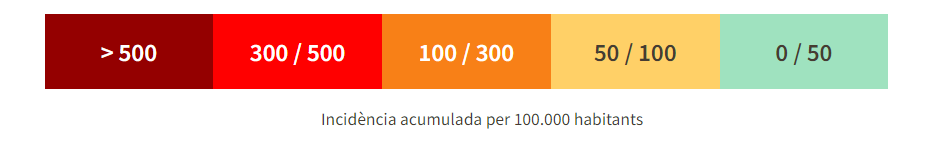

In [ ]:
findes = []
for i in range(len(df.fecha)):
  # Obtenemos la fecha 
  fecha = df.fecha[i]
  findes.append(dic_findes.get(fecha))

In [ ]:
incidencia['fecha'] = incidencia['fecha'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
# Diccionario
in_dic = dict(zip(incidencia.fecha, incidencia.Acumulats))

In [ ]:
val_acum = []
for i in range(len(df.fecha)):
  # Obtenemos la fecha 
  fecha = df.fecha[i]
  val_acum.append(dic_findes.get(fecha))

In [ ]:
prueba = df.merge(incidencia, on= 'fecha', how='left')
prueba

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,V22,H23,V23,H24,V24,covid,fecha,festivo,findes,Acumulats
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,V,31.0,V,33.0,V,0,2020-01-01,1,0,NaN
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,V,57.0,V,NaN,N,0,2020-01-02,0,0,NaN
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,V,32.0,V,NaN,N,0,2020-01-03,0,0,NaN
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,V,3.0,V,NaN,N,0,2020-01-04,0,1,NaN
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,V,29.0,V,25.0,V,0,2020-01-05,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,V,7.0,V,4.0,V,0,2021-12-26,0,1,1398.0
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,V,4.0,V,4.0,V,0,2021-12-27,0,0,1460.0
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,V,57.0,V,57.0,V,0,2021-12-28,0,0,1483.0
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,V,53.0,V,53.0,V,0,2021-12-29,0,0,1556.0


In [ ]:
aux = prueba.Acumulats.iloc[0]

In [ ]:
prueba

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,V22,H23,V23,H24,V24,covid,fecha,festivo,findes,Acumulats
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,V,31.0,V,33.0,V,0,2020-01-01,1,0,NaN
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,V,57.0,V,NaN,N,0,2020-01-02,0,0,NaN
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,V,32.0,V,NaN,N,0,2020-01-03,0,0,NaN
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,V,3.0,V,NaN,N,0,2020-01-04,0,1,NaN
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,V,29.0,V,25.0,V,0,2020-01-05,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,V,7.0,V,4.0,V,0,2021-12-26,0,1,1398.0
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,V,4.0,V,4.0,V,0,2021-12-27,0,0,1460.0
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,V,57.0,V,57.0,V,0,2021-12-28,0,0,1483.0
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,V,53.0,V,53.0,V,0,2021-12-29,0,0,1556.0


In [ ]:
val_acum = []
for i in range(len(prueba.fecha)):
  if prueba.fecha.iloc[i] in in_dic.keys():
    val_acum.append(in_dic.get(prueba.fecha.iloc[i]))
  else:
    val_acum.append(0)

In [ ]:
len(val_acum)

36113

In [ ]:
prueba['Acumulats'] = val_acum

In [ ]:
prueba

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,V22,H23,V23,H24,V24,covid,fecha,festivo,findes,Acumulats
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,V,31.0,V,33.0,V,0,2020-01-01,1,0,0
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,V,57.0,V,NaN,N,0,2020-01-02,0,0,0
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,V,32.0,V,NaN,N,0,2020-01-03,0,0,0
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,V,3.0,V,NaN,N,0,2020-01-04,0,1,0
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,V,29.0,V,25.0,V,0,2020-01-05,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,V,7.0,V,4.0,V,0,2021-12-26,0,1,1398
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,V,4.0,V,4.0,V,0,2021-12-27,0,0,1460
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,V,57.0,V,57.0,V,0,2021-12-28,0,0,1483
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,V,53.0,V,53.0,V,0,2021-12-29,0,0,1556


In [ ]:
# Creamos una función para establecer los niveles de incidencia
def niveles(x):
  '''
  Función que filtra un valor del índice acumulado y establece el nivel de incidencia.
  '''

  if x == 0:
    res = 0
  elif x < 50:
    res = 1
  elif x >= 50 and x < 100:
    res = 2
  elif x >= 100 and x < 300:
    res = 3
  elif x >= 300 and x < 500:
    res = 4
  elif x >= 500:
    res = 5

  return res


In [ ]:
df_cleaned['Niveles'] = df_cleaned['Acumulats'].apply(niveles)

In [ ]:
df_cleaned['covid'] = df_cleaned['Acumulats'].apply(lambda x: 1 if x is not 0 else 0)

In [ ]:
df_cleaned.to_csv('df_cleaned.csv')

In [ ]:
df_cleaned

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,H23,V23,H24,V24,covid,fecha,festivo,findes,Acumulats,Niveles
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,31.0,V,33.0,V,0,2020-01-01,1,0,0,0
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,57.0,V,NaN,N,0,2020-01-02,0,0,0,0
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,32.0,V,NaN,N,0,2020-01-03,0,0,0,0
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,3.0,V,NaN,N,0,2020-01-04,0,1,0,0
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,29.0,V,25.0,V,0,2020-01-05,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,7.0,V,4.0,V,1,2021-12-26,0,1,1398,5
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,4.0,V,4.0,V,1,2021-12-27,0,0,1460,5
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,57.0,V,57.0,V,1,2021-12-28,0,0,1483,5
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,53.0,V,53.0,V,1,2021-12-29,0,0,1556,5


In [ ]:
hola = df_cleaned
hola

,ESTACIO,CODI_CONTAMINANT,H01,V01,H02,V02,H03,V03,H04,V04,...,H23,V23,H24,V24,covid,fecha,festivo,findes,Acumulats,Niveles
0,4,7,3.0,V,3.0,V,2.0,V,1.0,V,...,31.0,V,33.0,V,0,2020-01-01,1,0,0,0
1,4,7,13.0,V,7.0,V,6.0,V,6.0,V,...,57.0,V,NaN,N,0,2020-01-02,0,0,0,0
2,4,7,33.0,V,13.0,V,16.0,V,3.0,V,...,32.0,V,NaN,N,0,2020-01-03,0,0,0,0
3,4,7,12.0,V,11.0,V,10.0,V,6.0,V,...,3.0,V,NaN,N,0,2020-01-04,0,1,0,0
4,4,7,1.0,V,1.0,V,2.0,V,2.0,V,...,29.0,V,25.0,V,0,2020-01-05,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36108,58,14,51.0,V,28.0,V,4.0,V,4.0,V,...,7.0,V,4.0,V,1,2021-12-26,0,1,1398,5
36109,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,4.0,V,4.0,V,1,2021-12-27,0,0,1460,5
36110,58,14,4.0,V,4.0,V,4.0,V,4.0,V,...,57.0,V,57.0,V,1,2021-12-28,0,0,1483,5
36111,58,14,57.0,V,56.0,V,56.0,V,55.0,V,...,53.0,V,53.0,V,1,2021-12-29,0,0,1556,5


In [ ]:
hours = ["H01","H02","H03","H04","H05","H06","H07","H08","H09","H10","H11","H12","H13","H14","H15","H16","H17","H18","H19","H20","H21","H22","H23","H24"]

long_mediciones = pd.melt(hola, id_vars=['ESTACIO', 'CODI_CONTAMINANT', 'covid', 'fecha',	'festivo',	'findes',	'Acumulats',	'Niveles'], value_vars=hours)

long_mediciones


,ESTACIO,CODI_CONTAMINANT,covid,fecha,festivo,findes,Acumulats,Niveles,variable,value
0,4,7,0,2020-01-01,1,0,0,0,H01,3.0
1,4,7,0,2020-01-02,0,0,0,0,H01,13.0
2,4,7,0,2020-01-03,0,0,0,0,H01,33.0
3,4,7,0,2020-01-04,0,1,0,0,H01,12.0
4,4,7,0,2020-01-05,0,1,0,0,H01,1.0
...,...,...,...,...,...,...,...,...,...,...
866707,58,14,1,2021-12-26,0,1,1398,5,H24,4.0
866708,58,14,1,2021-12-27,0,0,1460,5,H24,4.0
866709,58,14,1,2021-12-28,0,0,1483,5,H24,57.0
866710,58,14,1,2021-12-29,0,0,1556,5,H24,53.0


In [ ]:
#long_mediciones.to_csv('df_melt_mediciones.csv')

 # Last_Season

In [ ]:
import pandas as pd
data = pd.read_csv('df_melt_mediciones.csv')

In [ ]:
# Filtrar los contaminantes y los valores para determinar si hay o no contaminación.
data.CODI_CONTAMINANT.value_counts()

7      138432
8      138432
12     138432
10     103824
14     103248
1       69216
6       69216
22      20520
996     20520
997     20520
998     20520
999     20520
2        2064
9        1248
Name: CODI_CONTAMINANT, dtype: int64

In [ ]:
dat_fil = data[-( (data['CODI_CONTAMINANT'] == 996) | (data['CODI_CONTAMINANT'] == 997) | (data['CODI_CONTAMINANT'] == 998) | (data['CODI_CONTAMINANT'] == 999) )]

In [ ]:
dat_fil.CODI_CONTAMINANT.value_counts()

7     138432
8     138432
12    138432
10    103824
14    103248
1      69216
6      69216
22     20520
2       2064
9       1248
Name: CODI_CONTAMINANT, dtype: int64

In [ ]:
limp_Dat = dat_fil[-(dat_fil['value'].isna())]

In [ ]:
limp_Dat

,Unnamed: 0,ESTACIO,CODI_CONTAMINANT,covid,fecha,festivo,findes,Acumulats,Niveles,variable,value
0,0,4,7,0,2020-01-01,1,0,0,0,H01,3.0
1,1,4,7,0,2020-01-02,0,0,0,0,H01,13.0
2,2,4,7,0,2020-01-03,0,0,0,0,H01,33.0
3,3,4,7,0,2020-01-04,0,1,0,0,H01,12.0
4,4,4,7,0,2020-01-05,0,1,0,0,H01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
866707,866707,58,14,1,2021-12-26,0,1,1398,5,H24,4.0
866708,866708,58,14,1,2021-12-27,0,0,1460,5,H24,4.0
866709,866709,58,14,1,2021-12-28,0,0,1483,5,H24,57.0
866710,866710,58,14,1,2021-12-29,0,0,1556,5,H24,53.0


In [ ]:
limp_Dat.CODI_CONTAMINANT.value_counts()

7     131817
12    131816
8     131742
14     98228
10     97078
1      66040
6      65598
22     19695
2       1997
9       1146
Name: CODI_CONTAMINANT, dtype: int64

- El **carbono negro** (Black carbon - Etiqueta 22)  indica tráfico, pero no tiene un valor límite establecido según la normativa relativa a la calidad del aire ambiente. Sin embargo, sus medidas son un aporte importante en la evaluación de la calidad del aire ya quie son un bune indicador del tráfico. Su información es complementaria para la evaluación de la calidad del aire y la caracterización de las fuentes emisoras de los contaminados.

https://www.catalunyapress.es/texto-diario/mostrar/2799496/2020-cumplen-objetivos-calidad-aire-todas-zonas-cataluna

In [ ]:
# Eliminamos las etiquetas correspondientes al Black carbon
limp_Dat = limp_Dat[- (limp_Dat['CODI_CONTAMINANT'] == 22) ]

In [ ]:
limp_Dat

,Unnamed: 0,ESTACIO,CODI_CONTAMINANT,covid,fecha,festivo,findes,Acumulats,Niveles,variable,value
0,0,4,7,0,2020-01-01,1,0,0,0,H01,3.0
1,1,4,7,0,2020-01-02,0,0,0,0,H01,13.0
2,2,4,7,0,2020-01-03,0,0,0,0,H01,33.0
3,3,4,7,0,2020-01-04,0,1,0,0,H01,12.0
4,4,4,7,0,2020-01-05,0,1,0,0,H01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
866707,866707,58,14,1,2021-12-26,0,1,1398,5,H24,4.0
866708,866708,58,14,1,2021-12-27,0,0,1460,5,H24,4.0
866709,866709,58,14,1,2021-12-28,0,0,1483,5,H24,57.0
866710,866710,58,14,1,2021-12-29,0,0,1556,5,H24,53.0


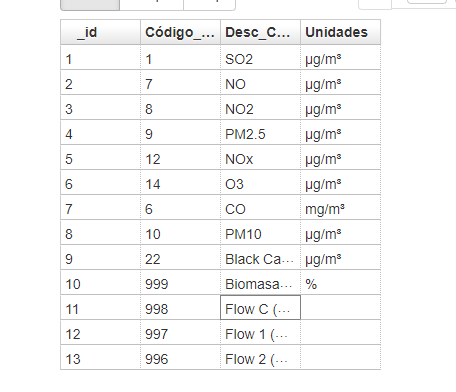

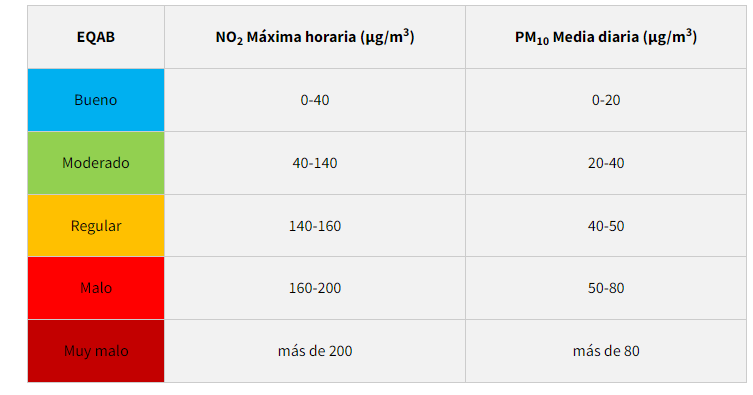

https://mediambient.gencat.cat/es/05_ambits_dactuacio/atmosfera/index.html

https://ajuntament.barcelona.cat/qualitataire/es/qualitat-de-laire/com-es-lluita-contra-la-contaminacio/la-red-de-vigilancia-y-prevision-de-la

https://ajuntament.barcelona.cat/qualitataire/es/la-contaminacio/otros-contaminantes


https://mediambient.gencat.cat/ca/05_ambits_dactuacio/atmosfera/qualitat_de_laire/vols-saber-que-respires/



In [ ]:
def contaminantes(tipo, valor):
  '''
  Función que analice el nivel de cada contaminante y devuelva si es un valor perjudicial o no.
  1: Perjudicial
  0 ; No perjudicial
  '''
  res = 0

  # 1 - SO2 [ug/m2] es cont > 125
  if tipo == 1 and valor >=125:
    res = 1

  # 6 - C0 [ug/m2] es cont > 34
  elif tipo == 6 and valor >= 34:
    res = 1

  # 7 - NO [ug/m2] es cont >= 40
  elif tipo == 7 and valor >= 40:
    res = 1

  # 8 - NO2 [ug/m2] es cont >= 160
  elif tipo == 8 and valor >= 160:
    res = 1

  # 9 - PM 2,5 [ug/m2] es cont >= 25
  elif tipo == 9 and valor >= 25:
    res = 1

  # 10 - PM10 [ug/m2] es cont >= 50
  elif tipo == 10 and valor >= 50:
    res = 1

  # 12 - NOx [ug/m2] es cont >= 30
  elif tipo == 12 and valor >= 30:
    res = 1

  # 14 - O3 [ug/m2] es cont >= 110
  elif tipo == 14 and valor >= 110:
    res = 1

  return res

In [ ]:
cont_perj = []
for i in range(len(limp_Dat)):
  aux = contaminantes(limp_Dat.CODI_CONTAMINANT.iloc[i], limp_Dat.value.iloc[i])
  cont_perj.append(aux)

In [ ]:
limp_Dat['Perjudicial'] = cont_perj

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
limp_Dat = limp_Dat.drop(columns=['Unnamed: 0'])

In [ ]:
limp_Dat

,ESTACIO,CODI_CONTAMINANT,covid,fecha,festivo,findes,Acumulats,Niveles,variable,value,Perjudicial
0,4,7,0,2020-01-01,1,0,0,0,H01,3.0,0
1,4,7,0,2020-01-02,0,0,0,0,H01,13.0,0
2,4,7,0,2020-01-03,0,0,0,0,H01,33.0,0
3,4,7,0,2020-01-04,0,1,0,0,H01,12.0,0
4,4,7,0,2020-01-05,0,1,0,0,H01,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
866707,58,14,1,2021-12-26,0,1,1398,5,H24,4.0,0
866708,58,14,1,2021-12-27,0,0,1460,5,H24,4.0,0
866709,58,14,1,2021-12-28,0,0,1483,5,H24,57.0,0
866710,58,14,1,2021-12-29,0,0,1556,5,H24,53.0,0


In [ ]:
# Guardamos los cambios realizados
limp_Dat.to_csv('dataModel.csv')

# Preprocesing 

In [ ]:
data = pd.read_csv('dataModel.csv')

In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data

,ESTACIO,CODI_CONTAMINANT,covid,fecha,festivo,findes,Acumulats,Niveles,variable,value,Perjudicial
0,4,7,0,2020-01-01,1,0,0,0,H01,3.0,0
1,4,7,0,2020-01-02,0,0,0,0,H01,13.0,0
2,4,7,0,2020-01-03,0,0,0,0,H01,33.0,0
3,4,7,0,2020-01-04,0,1,0,0,H01,12.0,0
4,4,7,0,2020-01-05,0,1,0,0,H01,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
725457,58,14,1,2021-12-26,0,1,1398,5,H24,4.0,0
725458,58,14,1,2021-12-27,0,0,1460,5,H24,4.0,0
725459,58,14,1,2021-12-28,0,0,1483,5,H24,57.0,0
725460,58,14,1,2021-12-29,0,0,1556,5,H24,53.0,0
